

*   Cement --quantitative-- kg in a m3 mixture

*   Blast Furnace Slag --quantitative--kg in a m3 mixture

*   Fly Ash --quantitative--kg in a m3 mixture
*   Water-- quantitative-- kg in a m3 mixture


*   Superplasticizer --quantitative--kg in a m3


*   Coars Aggregate-- quantitative-- kg in a m3 mixture

*   Fine Aggregate --quantitative--kg in a m3 mixture

*   Age --quantitative-- Day (1 ~ 365)
*   Concrete compressive strength --quantitative--MPa, megapascals

This dataset contrains the following instances and attributes

*   Number of instances: 1029


*   Number of attributes: 9 continuos attributes








In [49]:
import pandas as pd
HDNames = ['Cement','BFS','FLA','Water','SP','CA','FA','Age','CCS']
# from google.colab import drive
# drive.mount('/content/drive')
Data = pd.read_excel('ConcreteData.xlsx')

In [50]:
%cd /content/drive/My Drive/Colab Notebooks

[WinError 3] The system cannot find the path specified: '/content/drive/My Drive/Colab Notebooks'
c:\Users\Pratham R Gowda\OneDrive\Documents\concrete


In [51]:
# Data = pd.read_excel('ConcreteData.xlsx',names=HDNames)

In [52]:
print(Data.head(20))

      540      0  0.1    162  2.5    1040    676   28  79.986111
0   540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  61.887366
1   332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  40.269535
2   332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  41.052780
3   198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  44.296075
4   266.0  114.0  0.0  228.0  0.0   932.0  670.0   90  47.029847
5   380.0   95.0  0.0  228.0  0.0   932.0  594.0  365  43.698299
6   380.0   95.0  0.0  228.0  0.0   932.0  594.0   28  36.447770
7   266.0  114.0  0.0  228.0  0.0   932.0  670.0   28  45.854291
8   475.0    0.0  0.0  228.0  0.0   932.0  594.0   28  39.289790
9   198.6  132.4  0.0  192.0  0.0   978.4  825.5   90  38.074244
10  198.6  132.4  0.0  192.0  0.0   978.4  825.5   28  28.021684
11  427.5   47.5  0.0  228.0  0.0   932.0  594.0  270  43.012960
12  190.0  190.0  0.0  228.0  0.0   932.0  670.0   90  42.326932
13  304.0   76.0  0.0  228.0  0.0   932.0  670.0   28  47.813782
14  380.0    0.0  0.0  22

In [53]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   540          1029 non-null   float64
 1   0            1029 non-null   float64
 2   0.1          1029 non-null   float64
 3   162          1029 non-null   float64
 4   2.5          1029 non-null   float64
 5   1040         1029 non-null   float64
 6   676          1029 non-null   float64
 7   28           1029 non-null   int64  
 8   79.98611076  1029 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [54]:
summary = Data.describe()
print(summary)

               540            0          0.1          162          2.5  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
mean    280.914091    73.967298    54.239796   181.585374     6.206710   
std     104.245542    86.290255    64.005258    21.357226     5.975279   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     192.000000     0.000000     0.000000   164.900000     0.000000   
50%     272.800000    22.000000     0.000000   185.000000     6.350000   
75%     350.000000   143.000000   118.270000   192.000000    10.160000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

              1040          676           28    79.986111  
count  1029.000000  1029.000000  1029.000000  1029.000000  
mean    972.853401   773.673712    45.679300    35.774912  
std      77.763459    80.156602    63.198226    16.656880  
min     801.000000   594.000000     1.000000     2.331808  
25%     932.000000   732.600000  

In [55]:
# boxplot is a graphical representation used to describe the distribution of a sample by simple dispersion and position indexes

Seaborns and there are some important features:


*   A dataset-oriented API for examing relationships between multiple variables
*   Specialized support for using categorical variables to show observations and aggregate statistics

*   Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
*   Automatic estimation and plotting of linear regression models for different kinds of dependent varaibles


*   Convient views onto the overal structure of complex datasets
*   High level abstractions for structuring multiplot grids that let you easily build complex visualizations


*   Concise control over Matplotlon figure styling with several built-in theme
*  Tools for choosing color palettes that faithfully reveal patterns in your data









<Axes: >

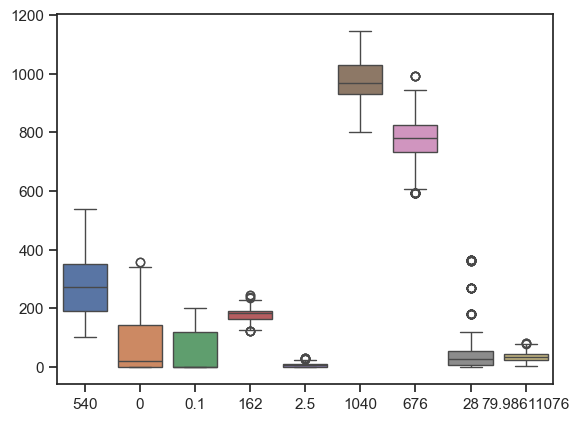

In [56]:
import seaborn as sns
sns.set(style="ticks") # color of the axes. The available styles are darkgrid, white grid, dark, white, and ticks
sns.boxplot(data=Data)

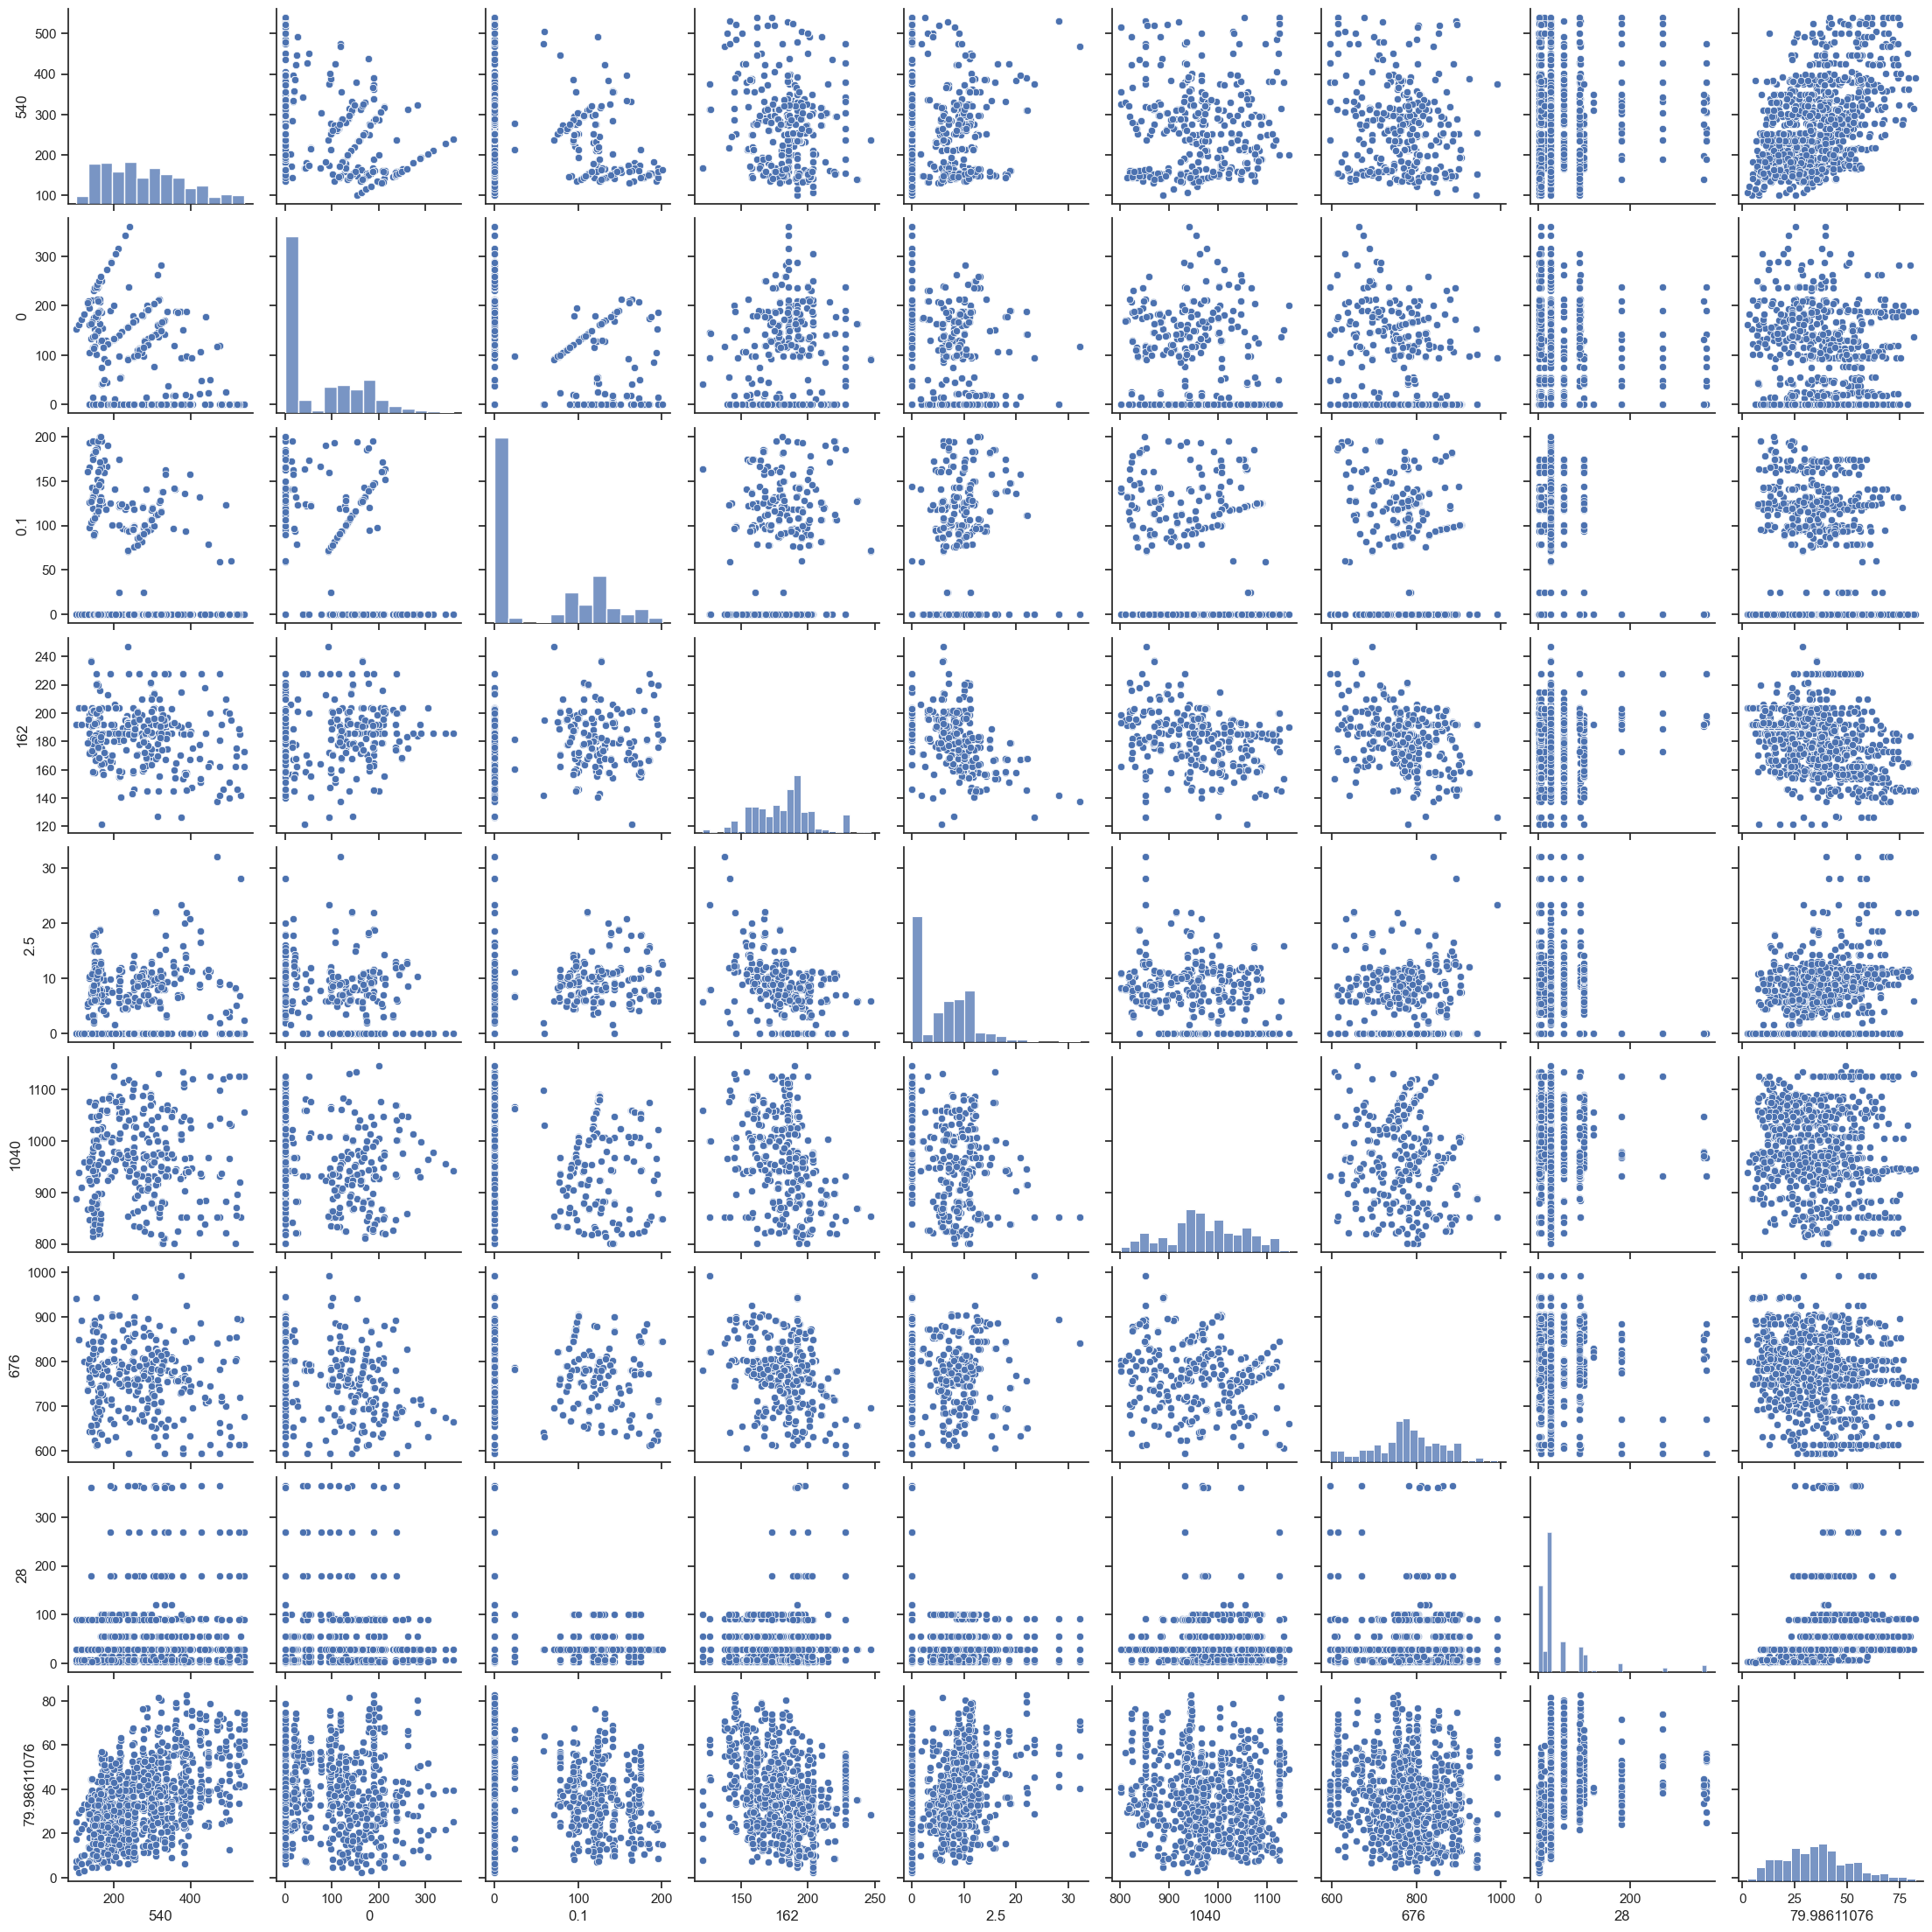

In [57]:
sns.pairplot(data=Data)

Focusing on the last line of the graph, it contains scatter plots of the target of our concrete compressive strength (CCS) data compared to the predictors. Except foer Cement, there is no particular trend.

x(scaled) = (x-x(min)/(x(max)-x(min)))

In [68]:
from sklearn.preprocessing import MinMaxScaler
import joblib
Data.columns = HDNames
predictor_columns = Data.columns[:-1]  # All columns except the last one
target_column = Data.columns[-1]  # The last column 


In [69]:
from sklearn.model_selection import train_test_split
Predictors = Data[predictor_columns]
Response = Data[[target_column]]

In [70]:
scaler = MinMaxScaler()
scaled_predictors = scaler.fit_transform(Predictors)

joblib.dump(scaler, "scaler.save")

DataScaled = pd.DataFrame(scaled_predictors, columns=predictor_columns)
DataScaled[target_column] = Response.values

In [71]:
Pred_train,Pred_test,Resp_train,Resp_test=train_test_split(Predictors, Response,test_size = 0.30, random_state=1) #30% of the data is divided up as test data
print(Pred_train.shape)
print(Pred_test.shape)
print(Resp_train.shape)
print(Resp_test.shape)

(720, 8)
(309, 8)
(720, 1)
(309, 1)






1.   Import the Sequential from keras.models

1.   Stack layers using the .add() method
2.   Configure the learning process using .compile() method
2.   Train the model on train dataset using .fit() method








In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# fully connected neural network with 4 levels (2 hidden layers)
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))


c:\Users\Pratham R Gowda\OneDrive\Documents\concrete\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])



1.   adam optimizer: This is an algorithm for first order, gradient-based optimization of stochastic objective function based on adaptive estimates of lower order moments
2.   mean_squared_error loss function: Mean squared error (MSE) measures the average of the squares errors- tahat is the average squared difference between the actual estimaed values and what's to be estimated. MSE is a measure of the quality of an estimator- it's always non-negative and the coloser the values are to zero, the better


1.   accuracy metric: A metric is a function that is used to evaluate the performance of your model during training and testing





In [74]:
model.fit(Pred_train,Resp_train,epochs=1000, verbose=1)

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 1242.3558   
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 394.6669 
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 317.3368 
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 238.5643 
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 221.3553 
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 196.8058 
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 187.9475 
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 159.1189 
Epoch 9/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 164.8452 
Epoch 10/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 157.4180 
Epoch 11/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0



*   Pred_train: This is an array of predictors training data
*   Resp_train: This is an array of response data


*   epochs = 1000: This is the number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
*   verbose = 1: this is an integer: 0,1,and 2. Here the different verbosity modes represent the following; 0 = silent, 1 = progress bar and 2 = one line per epoch





In [75]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,535 (6.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,024 (4.00 KB)

Calculate the coefficient of determination (R-squared)

*   R-squared is a meausre of how well a model can predict the data, and it lies between 0 and 1; The higher the value of the coefficient of determination, the better the mode is at predicting the data.
*   R-squared (also denoted as R2) is defined as the proportion of variances in the depedent variable that is predictable from the independent variable.
To calcalate the coefficient of determination we can use the r2_score() function






In [76]:
from sklearn.metrics import r2_score
# to calcualte R2 we need ground truth target values and the estimated target values
y_predKM = model.predict(Pred_test)
print('Coefficient of determination of Keras Model')
print(r2_score(Resp_test,y_predKM))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Coefficient of determination of Keras Model
0.8260326385498047


Outlier distort data analysis result

---
We will use Turkey's method which will use the interquartile range (IQR) approach


---

IQR  = DataScaled.quantile(0.75) - DataScaled.quantile(0.25)


In [77]:
Q1 = DataScaled.quantile(0.25)
Q3= DataScaled.quantile(0.75)
IQR=Q3-Q1
print('IQR:',IQR)

IQR: Cement     0.360731
BFS        0.397885
FLA        0.591054
Water      0.216367
SP         0.315528
CA         0.283140
FA         0.229303
Age        0.134615
CCS       22.243185
dtype: float64


In [78]:
DataScaledOut = DataScaled[~((DataScaled < (Q1 - 1.5 * IQR)) | (DataScaled > (Q3 + 1.5 * IQR))).any(axis=1)]
DataScaledOut.shape
#1029 to 925

(925, 9)

<Axes: >

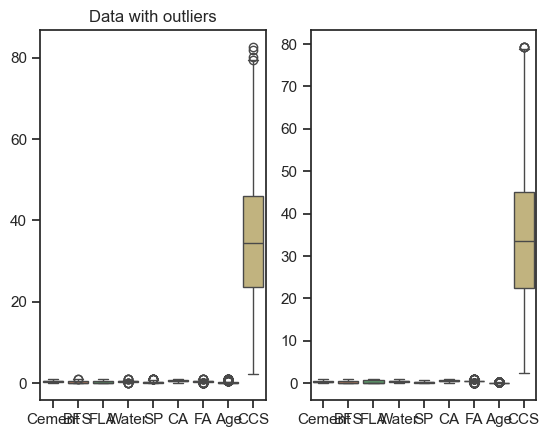

In [79]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(121)
sns.boxplot(data = DataScaled)
plt.title("Data with outliers")

plt.subplot(122)
sns.boxplot(data = DataScaledOut)

In [80]:
Predictors2 = DataScaledOut[predictor_columns]
Response2  = DataScaledOut[[target_column]]

In [81]:
Pred_train2,Pred_test2,Resp_train2,Resp_test2=train_test_split(Predictors2, Response2,test_size = 0.30, random_state=1) #30% of the data is divided up as test data
print(Pred_train2.shape)
print(Pred_test2.shape)
print(Resp_train2.shape)
print(Resp_test2.shape)

(647, 8)
(278, 8)
(647, 1)
(278, 1)


In [82]:
# fully connected neural network with 4 levels (2 hidden layers)
model_no_outliers = Sequential()
model_no_outliers.add(Dense(20, input_dim=8, activation='relu')) # input layer which has 20 neurons, 8 input colums
model_no_outliers.add(Dense(10, activation='relu'))# second layer which has 10 neurons
model_no_outliers.add(Dense(10, activation='relu'))# third layers which has 10 neurons

model_no_outliers.add(Dense(1, activation='linear')) # output layer which has 1 neuron

c:\Users\Pratham R Gowda\OneDrive\Documents\concrete\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model_no_outliers.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])

In [84]:
model_no_outliers.fit(Pred_train2,Resp_train2,epochs=1000, verbose=1)
model_no_outliers.save("concrete_model.keras")

Epoch 1/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 1477.9683   
Epoch 2/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1428.6193 
Epoch 3/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1474.3551 
Epoch 4/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1416.1255 
Epoch 5/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1313.5389
Epoch 6/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1236.1509 
Epoch 7/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1090.2980 
Epoch 8/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 819.2277 
Epoch 9/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 558.6101 
Epoch 10/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 372.5301 
Epoch 11/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

In [85]:
model_no_outliers.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,535 (6.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,024 (4.00 KB)

In [86]:
Y_predKM2 = model_no_outliers.predict(Pred_test2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [87]:
print('Coefficient of determination if Neural Network Model without outliers')
print(r2_score(Resp_test2,Y_predKM2))

Coefficient of determination if Neural Network Model without outliers
0.847115159034729


Text(0.5, 1.0, 'Data with outliers')

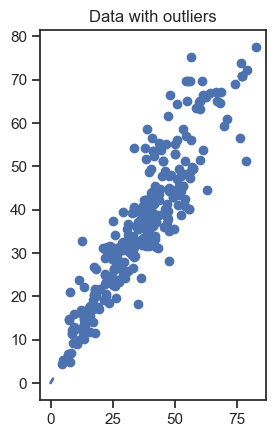

In [88]:
plt.figure(1)
plt.subplot(121)
plt.scatter(Resp_test,y_predKM)
plt.plot([0,1],[0,1],linewidth=2)
plt.title("Data with outliers")

Text(0.5, 1.0, 'Data without outliers')

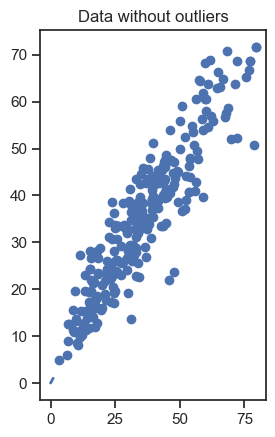

In [89]:
plt.subplot(122)
plt.scatter(Resp_test2,Y_predKM2)
plt.plot([0,1],[0,1],linewidth=2)
plt.title("Data without outliers")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("concrete_model.keras")
scaler = joblib.load("scaler.save")

def assess_Concrete_Quality(strength):
    print("The concrete's predicted strength is:", strength)
    if strength < 25:
        return "Low Quality"
    elif 25 <= strength < 45:
        return "Medium Quality"
    else:
        return "High Quality"


In [99]:
import numpy as np
def predict_Concrete_Quality(model,scaler,input_data):
    # Scale the input data
    # scaled_input = scaler.transform([input_data])
    
    # Predict the strength using the model
    # predicted_strength = model.predict(scaled_input)[0][0]
    
    # Assess the quality based on the predicted strength
    # quality = assess_Concrete_Quality(predicted_strength)
       
    input_array = np.array(input_data).reshape(1, -1)
    input_df = pd.DataFrame(input_array, columns=predictor_columns)
    scaled_input = scaler.transform(input_df)
    predicted_strength = model.predict(scaled_input)[0][0]
    quality = assess_Concrete_Quality(predicted_strength)
    return predicted_strength, quality

test_data = [300.0, 80.0, 50.0, 180.0, 6.0, 970.0, 780.0, 28.0]
stren, qua = predict_Concrete_Quality(model, scaler, test_data)
print(f"Predicted Strength: {stren.item(): .2f} MPa.\nQuality: {qua}")
test_data1 = [400.0, 90.0, 50.0, 190.0, 7.0, 980.0, 780.0, 18.0]
stren1, qua1 = predict_Concrete_Quality(model, scaler, test_data1)
print(f"Predicted Strength: {stren1.item(): .2f} MPa.\nQuality: {qua1}")
test_data2 = [100.0, 50.0, 20.0, 90.0, 3.0, 580.0, 480.0, 8.0]
stren2, qua2 = predict_Concrete_Quality(model, scaler, test_data2)
print(f"Predicted Strength: {stren2.item(): .2f} MPa.\nQuality: {qua2}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Strength:  43.40 MPa.
Quality: Medium Quality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Strength:  49.50 MPa.
Quality: High Quality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Strength:  5.18 MPa.
Quality: Low Quality
